<a href="https://colab.research.google.com/github/obeabi/AirlineSentiment/blob/main/Airline_Freq_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Sentiment Dataset
## Written by Abiola Obembe
### Date: 2020-12-24

### Goal: Train a classifiier to predict customer sentiment from customer review text (using Frequency word embeddings)


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Step 1: Data Cleaning and Preprocessing

In [19]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("installation complete!")


installation complete!


In [20]:
# Import dataset
dataset = pd.read_csv('Tweets.csv', encoding= 'latin1', engine='python', quoting = 1)

dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [21]:
# Drop columns not required
dataset.drop(columns = ['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence',
                        'airline', 'airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord',
                        'tweet_created','tweet_location','user_timezone'], axis = 1, inplace = True)
dataset.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [22]:
#  Investigate the number of distinct sentiments
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

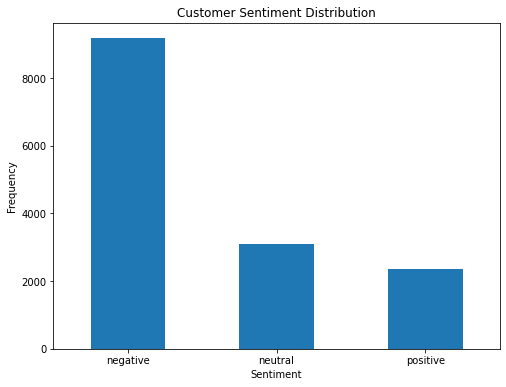

In [23]:
# Lets visualize the sentiments
count_classes = pd.value_counts(dataset['airline_sentiment'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Customer Sentiment Distribution")
plt.xticks(range(3))
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

In [24]:
# Let us check for missing values in both columns
print(dataset.isnull().sum())

missing_values = dataset.isnull().sum().sum()
print('The total number of missing values in the dataframe is' , str(missing_values))

airline_sentiment    0
text                 0
dtype: int64
The total number of missing values in the dataframe is 0


In [34]:
## Data Cleaning

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []
corpus2 = []



for i in range(0,dataset.shape[0]):
  reviews = re.sub(r"@[A-Za-z0-9]+", ' ', dataset['text'][i])
  reviews = re.sub(r'[^a-zA-Z]', ' ',reviews)
  # Removing additional whitespaces
  reviews = re.sub(r" +", ' ', reviews)
  reviews = reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  wl = WordNetLemmatizer()
  #review = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]

  review2 = [wl.lemmatize(word) for word in reviews if not word in set(all_stopwords)]
  #review = ' '.join(review)
  review2 = ' '.join(review2)
  #corpus.append(review)
  corpus2.append(review2)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# print corpus
#print(corpus)

['said', 'plu ad commerci experi tacki', 'today must mean need take anoth trip', 'realli aggress blast obnoxi entertain guest face amp littl recours', 'realli big bad thing', 'serious would pay flight seat play realli bad thing fli va', 'ye nearli everi time fli vx ear worm go away', 'realli miss prime opportun men without hat parodi http co mwpg grezp', 'well', 'amaz arriv hour earli good', 'know suicid second lead caus death among teen', 'lt pretti graphic much better minim iconographi', 'great deal alreadi think nd trip amp even gone st trip yet p', 'fli fabul seduct sky u take stress away travel http co ahlxhhkiyn', 'thank', 'sfo pdx schedul still mia', 'excit first cross countri flight lax mco heard noth great thing virgin america daystogo', 'flew nyc sfo last week fulli sit seat due two larg gentleman either side help', 'fli', 'know would amazingli awesom bo fll pleas want fli', 'first fare may three time carrier seat avail select', 'love graphic http co ut grrwaaa', 'love hipste

In [35]:
# print corpus 2
print(corpus2)

['said', 'plus added commercial experience tacky', 'today must mean need take another trip', 'really aggressive blast obnoxious entertainment guest face amp little recourse', 'really big bad thing', 'seriously would pay flight seat playing really bad thing flying va', 'yes nearly every time fly vx ear worm go away', 'really missed prime opportunity men without hat parody http co mwpg grezp', 'well', 'amazing arrived hour early good', 'know suicide second leading cause death among teen', 'lt pretty graphic much better minimal iconography', 'great deal already thinking nd trip amp even gone st trip yet p', 'flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn', 'thanks', 'sfo pdx schedule still mia', 'excited first cross country flight lax mco heard nothing great thing virgin america daystogo', 'flew nyc sfo last week fully sit seat due two large gentleman either side help', 'flying', 'know would amazingly awesome bos fll please want fly', 'first fare may three time

In [36]:
# Let us encode the labels into integers 
from sklearn import preprocessing 
  
# label_encoder 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
dataset['airline_sentiment']= label_encoder.fit_transform(dataset['airline_sentiment']) 
  
dataset['airline_sentiment'].unique() 

array([1, 2, 0])

## Step 2: Tokenization ( Count Vectorization)

In [39]:
# Count Vector Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer,HashingVectorizer
cv = CountVectorizer(11600)
X = cv.fit_transform(corpus2).toarray()
y = dataset['airline_sentiment'].values

print(len(X[0]))

11828


In [40]:
# Split dataset into train and test spli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Build and train your Classifier 

### Model 1: Naive Bayes

In [41]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print(classifier)

GaussianNB(priors=None, var_smoothing=1e-09)


In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 0]
 [2 0]
 ...
 [0 1]
 [2 1]
 [2 0]]


In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[874 389 626]
 [119 173 288]
 [ 80  76 303]]


0.4610655737704918

### Model 2: CatBoost

In [44]:
!pip install catboost

     |████████████████████████████████| 66.3MB 56kB/s 


In [45]:
# Build and train a catboost classifier
from catboost import CatBoostClassifier
classifier2 = CatBoostClassifier()
classifier2.fit(X_train,y_train)


Learning rate set to 0.089706
0:	learn: 1.0504327	total: 151ms	remaining: 2m 30s
1:	learn: 1.0116258	total: 249ms	remaining: 2m 4s
2:	learn: 0.9783842	total: 341ms	remaining: 1m 53s
3:	learn: 0.9524051	total: 422ms	remaining: 1m 45s
4:	learn: 0.9316734	total: 501ms	remaining: 1m 39s
5:	learn: 0.9138230	total: 581ms	remaining: 1m 36s
6:	learn: 0.8968327	total: 665ms	remaining: 1m 34s
7:	learn: 0.8825255	total: 744ms	remaining: 1m 32s
8:	learn: 0.8696916	total: 824ms	remaining: 1m 30s
9:	learn: 0.8579393	total: 909ms	remaining: 1m 29s
10:	learn: 0.8480392	total: 989ms	remaining: 1m 28s
11:	learn: 0.8392389	total: 1.07s	remaining: 1m 28s
12:	learn: 0.8317594	total: 1.17s	remaining: 1m 28s
13:	learn: 0.8237083	total: 1.26s	remaining: 1m 28s
14:	learn: 0.8157546	total: 1.34s	remaining: 1m 28s
15:	learn: 0.8105765	total: 1.43s	remaining: 1m 27s
16:	learn: 0.8048281	total: 1.51s	remaining: 1m 27s
17:	learn: 0.7998793	total: 1.6s	remaining: 1m 27s
18:	learn: 0.7960027	total: 1.69s	remaining: 1

In [46]:
# Predicting the Test set results
y_hat = classifier2.predict(X_test)
print(np.concatenate((y_hat.reshape(len(y_hat),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
print(cm)
accuracy_score(y_test, y_hat)

[[1785   55   49]
 [ 364  173   43]
 [ 155   32  272]]


0.7616120218579235

### Model 3: Random Forest Classifier

In [48]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier( criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
# Predicting the Test set results
y_hat = classifier3.predict(X_test)
print(np.concatenate((y_hat.reshape(len(y_hat),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
print(cm)
accuracy_score(y_test, y_hat)

[[1671  171   47]
 [ 233  291   56]
 [ 111   69  279]]


0.7653688524590164